In [1]:
!pip install requests beautifulsoup4 pandas nltk

In [2]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torchaudio 2.3.0+cu121
Uninstalling torchaudio-2.3.0+cu121:
  Successfully uninstalled torchaudio-2.3.0+cu121


In [4]:
!conda install pytorch-cuda==11.8 -c pytorch -c nvidia

/bin/bash: line 1: conda: command not found


In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.3.1%2Bcu118-cp310-cp310-linux_x86_64.whl (839.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import pandas as pd

# Define the bands, genres, and subgenres
bands_data = [
    ("The Beatles", "Rock", "Classic Rock"),
    ("The Rolling Stones", "Rock", "Classic Rock"),
    ("The Who", "Rock", "Classic Rock"),
    ("Led Zeppelin", "Rock", "Classic Rock"),
    ("The Doors", "Rock", "Classic Rock"),
    ("Pink Floyd", "Rock", "Classic Rock"),
    ("Queen", "Rock", "Classic Rock"),
    ("Creedence Clearwater Revival", "Rock", "Classic Rock"),
    ("Jimi Hendrix", "Rock", "Classic Rock"),
    ("Deep Purple", "Rock", "Classic Rock"),
    ("AC/DC", "Rock", "Hard Rock"),
    ("Aerosmith", "Rock", "Hard Rock"),
    ("Guns N' Roses", "Rock", "Hard Rock"),
    ("Van Halen", "Rock", "Hard Rock"),
    ("Def Leppard", "Rock", "Hard Rock"),
    ("Kiss", "Rock", "Hard Rock"),
    ("Bon Jovi", "Rock", "Hard Rock"),
    ("Whitesnake", "Rock", "Hard Rock"),
    ("Scorpions", "Rock", "Hard Rock"),
    ("Motörhead", "Rock", "Hard Rock"),
    ("Black Sabbath", "Metal", "Heavy Metal"),
    ("Iron Maiden", "Metal", "Heavy Metal"),
    ("Judas Priest", "Metal", "Heavy Metal"),
    ("Metallica", "Metal", "Heavy Metal"),
    ("Megadeth", "Metal", "Heavy Metal"),
    ("Slayer", "Metal", "Heavy Metal"),
    ("Anthrax", "Metal", "Heavy Metal"),
    ("Pantera", "Metal", "Heavy Metal"),
    ("Dio", "Metal", "Heavy Metal"),
    ("Saxon", "Metal", "Heavy Metal"),
    ("Metallica", "Metal", "Thrash Metal"),
    ("Megadeth", "Metal", "Thrash Metal"),
    ("Slayer", "Metal", "Thrash Metal"),
    ("Anthrax", "Metal", "Thrash Metal"),
    ("Exodus", "Metal", "Thrash Metal"),
    ("Overkill", "Metal", "Thrash Metal"),
    ("Testament", "Metal", "Thrash Metal"),
    ("Kreator", "Metal", "Thrash Metal"),
    ("Sepultura", "Metal", "Thrash Metal"),
    ("Sodom", "Metal", "Thrash Metal"),
    ("Death", "Metal", "Death Metal"),
    ("Cannibal Corpse", "Metal", "Death Metal"),
    ("Morbid Angel", "Metal", "Death Metal"),
    ("Obituary", "Metal", "Death Metal"),
    ("Deicide", "Metal", "Death Metal"),
    ("Entombed", "Metal", "Death Metal"),
    ("Dismember", "Metal", "Death Metal"),
    ("Carcass", "Metal", "Death Metal"),
    ("Bolt Thrower", "Metal", "Death Metal"),
    ("At the Gates", "Metal", "Death Metal"),
    ("Venom", "Metal", "Black Metal"),
    ("Bathory", "Metal", "Black Metal"),
    ("Mayhem", "Metal", "Black Metal"),
    ("Darkthrone", "Metal", "Black Metal"),
    ("Emperor", "Metal", "Black Metal"),
    ("Immortal", "Metal", "Black Metal"),
    ("Burzum", "Metal", "Black Metal"),
    ("Gorgoroth", "Metal", "Black Metal"),
    ("Satyricon", "Metal", "Black Metal"),
    ("Watain", "Metal", "Black Metal"),
    ("Black Sabbath", "Metal", "Doom Metal"),
    ("Candlemass", "Metal", "Doom Metal"),
    ("Saint Vitus", "Metal", "Doom Metal"),
    ("Trouble", "Metal", "Doom Metal"),
    ("Electric Wizard", "Metal", "Doom Metal"),
    ("My Dying Bride", "Metal", "Doom Metal"),
    ("Paradise Lost", "Metal", "Doom Metal"),
    ("Pentagram", "Metal", "Doom Metal"),
    ("Katatonia", "Metal", "Doom Metal"),
    ("Solitude Aeturnus", "Metal", "Doom Metal"),
    ("Pink Floyd", "Rock", "Progressive Rock"),
    ("King Crimson", "Rock", "Progressive Rock"),
    ("Yes", "Rock", "Progressive Rock"),
    ("Genesis", "Rock", "Progressive Rock"),
    ("Rush", "Rock", "Progressive Rock"),
    ("Emerson, Lake & Palmer", "Rock", "Progressive Rock"),
    ("Jethro Tull", "Rock", "Progressive Rock"),
    ("Camel", "Rock", "Progressive Rock"),
    ("Gentle Giant", "Rock", "Progressive Rock"),
    ("Van der Graaf Generator", "Rock", "Progressive Rock"),
    ("Dream Theater", "Metal", "Progressive Metal"),
    ("Opeth", "Metal", "Progressive Metal"),
    ("Queensrÿche", "Metal", "Progressive Metal"),
    ("Symphony X", "Metal", "Progressive Metal"),
    ("Tool", "Metal", "Progressive Metal"),
    ("Fates Warning", "Metal", "Progressive Metal"),
    ("Pain of Salvation", "Metal", "Progressive Metal"),
    ("Porcupine Tree", "Metal", "Progressive Metal"),
    ("Between the Buried and Me", "Metal", "Progressive Metal"),
    ("Haken", "Metal", "Progressive Metal"),
    ("Nirvana", "Rock", "Alternative Rock"),
    ("Pearl Jam", "Rock", "Alternative Rock"),
    ("Radiohead", "Rock", "Alternative Rock"),
    ("Soundgarden", "Rock", "Alternative Rock"),
    ("R.E.M.", "Rock", "Alternative Rock"),
    ("Alice in Chains", "Rock", "Alternative Rock"),
    ("Smashing Pumpkins", "Rock", "Alternative Rock"),
    ("Red Hot Chili Peppers", "Rock", "Alternative Rock"),
    ("Foo Fighters", "Rock", "Alternative Rock"),
    ("Stone Temple Pilots", "Rock", "Alternative Rock"),
    ("Nirvana", "Rock", "Grunge"),
    ("Pearl Jam", "Rock", "Grunge"),
    ("Soundgarden", "Rock", "Grunge"),
    ("Alice in Chains", "Rock", "Grunge"),
    ("Stone Temple Pilots", "Rock", "Grunge"),
    ("Mudhoney", "Rock", "Grunge"),
    ("Screaming Trees", "Rock", "Grunge"),
    ("Temple of the Dog", "Rock", "Grunge"),
    ("Mother Love Bone", "Rock", "Grunge"),
    ("Silverchair", "Rock", "Grunge"),
    ("The Ramones", "Rock", "Punk Rock"),
    ("Sex Pistols", "Rock", "Punk Rock"),
    ("The Clash", "Rock", "Punk Rock"),
    ("Dead Kennedys", "Rock", "Punk Rock"),
    ("The Misfits", "Rock", "Punk Rock"),
    ("Bad Religion", "Rock", "Punk Rock"),
    ("Black Flag", "Rock", "Punk Rock"),
    ("The Offspring", "Rock", "Punk Rock"),
    ("Green Day", "Rock", "Punk Rock"),
    ("NOFX", "Rock", "Punk Rock"),
    ("Joy Division", "Rock", "Post-Punk"),
    ("The Cure", "Rock", "Post-Punk"),
    ("Siouxsie and the Banshees", "Rock", "Post-Punk"),
    ("Bauhaus", "Rock", "Post-Punk"),
    ("Echo & the Bunnymen", "Rock", "Post-Punk"),
    ("Gang of Four", "Rock", "Post-Punk"),
    ("The Smiths", "Rock", "Post-Punk"),
    ("Public Image Ltd", "Rock", "Post-Punk"),
    ("Wire", "Rock", "Post-Punk"),
    ("Killing Joke", "Rock", "Post-Punk"),
    ("Depeche Mode", "Rock", "New Wave"),
    ("The Police", "Rock", "New Wave"),
    ("Duran Duran", "Rock", "New Wave"),
    ("Talking Heads", "Rock", "New Wave"),
    ("Blondie", "Rock", "New Wave"),
    ("The Cars", "Rock", "New Wave"),
    ("INXS", "Rock", "New Wave"),
    ("Tears for Fears", "Rock", "New Wave"),
    ("A Flock of Seagulls", "Rock", "New Wave"),
    ("The B-52's", "Rock", "New Wave"),
    ("Mötley Crüe", "Metal", "Glam Metal"),
    ("Poison", "Metal", "Glam Metal"),
    ("Twisted Sister", "Metal", "Glam Metal"),
    ("Ratt", "Metal", "Glam Metal"),
    ("Skid Row", "Metal", "Glam Metal"),
    ("W.A.S.P.", "Metal", "Glam Metal"),
    ("Cinderella", "Metal", "Glam Metal"),
    ("Quiet Riot", "Metal", "Glam Metal"),
    ("Great White", "Metal", "Glam Metal"),
    ("L.A. Guns", "Metal", "Glam Metal"),
    ("Nine Inch Nails", "Metal", "Industrial Metal"),
    ("Ministry", "Metal", "Industrial Metal"),
    ("Rammstein", "Metal", "Industrial Metal"),
    ("Marilyn Manson", "Metal", "Industrial Metal"),
    ("Fear Factory", "Metal", "Industrial Metal"),
    ("KMFDM", "Metal", "Industrial Metal"),
    ("Godflesh", "Metal", "Industrial Metal"),
    ("Rob Zombie", "Metal", "Industrial Metal"),
    ("Static-X", "Metal", "Industrial Metal"),
    ("Strapping Young Lad", "Metal", "Industrial Metal"),
    ("Korn", "Metal", "Nu Metal"),
    ("Slipknot", "Metal", "Nu Metal"),
    ("Limp Bizkit", "Metal", "Nu Metal"),
    ("Linkin Park", "Metal", "Nu Metal"),
    ("Deftones", "Metal", "Nu Metal"),
    ("Disturbed", "Metal", "Nu Metal"),
    ("System of a Down", "Metal", "Nu Metal"),
    ("Papa Roach", "Metal", "Nu Metal"),
    ("Coal Chamber", "Metal", "Nu Metal"),
    ("Mudvayne", "Metal", "Nu Metal"),
    ("Killswitch Engage", "Metal", "Metalcore"),
    ("As I Lay Dying", "Metal", "Metalcore"),
    ("All That Remains", "Metal", "Metalcore"),
    ("Trivium", "Metal", "Metalcore"),
    ("Parkway Drive", "Metal", "Metalcore"),
    ("August Burns Red", "Metal", "Metalcore"),
    ("Bullet for My Valentine", "Metal", "Metalcore"),
    ("Atreyu", "Metal", "Metalcore"),
    ("Unearth", "Metal", "Metalcore"),
    ("Bring Me the Horizon", "Metal", "Metalcore"),
    ("Neurosis", "Metal", "Post-Metal"),
    ("Isis", "Metal", "Post-Metal"),
    ("Pelican", "Metal", "Post-Metal"),
    ("Cult of Luna", "Metal", "Post-Metal"),
    ("Russian Circles", "Metal", "Post-Metal"),
    ("Mastodon", "Metal", "Post-Metal"),
    ("The Ocean", "Metal", "Post-Metal"),
    ("Rosetta", "Metal", "Post-Metal"),
    ("Alcest", "Metal", "Post-Metal"),
    ("Amenra", "Metal", "Post-Metal"),
    ("Kyuss", "Rock", "Stoner Rock"),
    ("Queens of the Stone Age", "Rock", "Stoner Rock"),
    ("Sleep", "Rock", "Stoner Rock"),
    ("Fu Manchu", "Rock", "Stoner Rock"),
    ("Monster Magnet", "Rock", "Stoner Rock"),
    ("Electric Wizard", "Rock", "Stoner Rock"),
    ("Clutch", "Rock", "Stoner Rock"),
    ("The Sword", "Rock", "Stoner Rock"),
    ("Orange Goblin", "Rock", "Stoner Rock"),
    ("Truckfighters", "Rock", "Stoner Rock"),
    ("Melvins", "Metal", "Sludge Metal"),
    ("Eyehategod", "Metal", "Sludge Metal"),
    ("Crowbar", "Metal", "Sludge Metal"),
    ("Acid Bath", "Metal", "Sludge Metal"),
    ("Down", "Metal", "Sludge Metal"),
    ("Corrosion of Conformity", "Metal", "Sludge Metal"),
    ("Neurosis", "Metal", "Sludge Metal"),
    ("High on Fire", "Metal", "Sludge Metal"),
    ("Baroness", "Metal", "Sludge Metal"),
    ("Kylesa", "Metal", "Sludge Metal"),
    ("Pantera", "Metal", "Groove Metal"),
    ("Lamb of God", "Metal", "Groove Metal"),
    ("Machine Head", "Metal", "Groove Metal"),
    ("Sepultura", "Metal", "Groove Metal"),
    ("Fear Factory", "Metal", "Groove Metal"),
    ("White Zombie", "Metal", "Groove Metal"),
    ("DevilDriver", "Metal", "Groove Metal"),
    ("Gojira", "Metal", "Groove Metal"),
    ("Soulfly", "Metal", "Groove Metal"),
    ("Chimaira", "Metal", "Groove Metal"),
    ("Finntroll", "Metal", "Folk Metal"),
    ("Ensiferum", "Metal", "Folk Metal"),
    ("Eluveitie", "Metal", "Folk Metal"),
    ("Korpiklaani", "Metal", "Folk Metal"),
    ("Turisas", "Metal", "Folk Metal"),
    ("Alestorm", "Metal", "Folk Metal"),
    ("Moonsorrow", "Metal", "Folk Metal"),
    ("Skyclad", "Metal", "Folk Metal"),
    ("Týr", "Metal", "Folk Metal"),
    ("Wintersun", "Metal", "Folk Metal"),
    ("Type O Negative", "Metal", "Gothic Metal"),
    ("Paradise Lost", "Metal", "Gothic Metal"),
    ("My Dying Bride", "Metal", "Gothic Metal"),
    ("Lacuna Coil", "Metal", "Gothic Metal"),
    ("Within Temptation", "Metal", "Gothic Metal"),
    ("Theatre of Tragedy", "Metal", "Gothic Metal"),
    ("Moonspell", "Metal", "Gothic Metal"),
    ("Tristania", "Metal", "Gothic Metal"),
    ("Leaves' Eyes", "Metal", "Gothic Metal"),
    ("Draconian", "Metal", "Gothic Metal"),
    ("Nightwish", "Metal", "Symphonic Metal"),
    ("Epica", "Metal", "Symphonic Metal"),
    ("Within Temptation", "Metal", "Symphonic Metal"),
    ("Therion", "Metal", "Symphonic Metal"),
    ("Kamelot", "Metal", "Symphonic Metal"),
    ("Rhapsody of Fire", "Metal", "Symphonic Metal"),
    ("Delain", "Metal", "Symphonic Metal"),
    ("Leaves' Eyes", "Metal", "Symphonic Metal"),
    ("Xandria", "Metal", "Symphonic Metal"),
    ("After Forever", "Metal", "Symphonic Metal")
]

# Create a DataFrame
df = pd.DataFrame(bands_data, columns=["Band", "Genre", "Subgenre"])

# Display the DataFrame
print(df)

                   Band  Genre         Subgenre
0           The Beatles   Rock     Classic Rock
1    The Rolling Stones   Rock     Classic Rock
2               The Who   Rock     Classic Rock
3          Led Zeppelin   Rock     Classic Rock
4             The Doors   Rock     Classic Rock
..                  ...    ...              ...
245    Rhapsody of Fire  Metal  Symphonic Metal
246              Delain  Metal  Symphonic Metal
247        Leaves' Eyes  Metal  Symphonic Metal
248             Xandria  Metal  Symphonic Metal
249       After Forever  Metal  Symphonic Metal

[250 rows x 3 columns]


In [ ]:
bands = [
    "The Beatles", "The Rolling Stones", "The Who", "Led Zeppelin", "The Doors",
    "Pink Floyd", "Queen", "Creedence Clearwater Revival", "Jimi Hendrix", "Deep Purple",
    "AC/DC", "Aerosmith", "Guns N' Roses", "Van Halen", "Def Leppard",
    "Kiss", "Bon Jovi", "Whitesnake", "Scorpions", "Motörhead",
    "Black Sabbath", "Iron Maiden", "Judas Priest", "Metallica", "Megadeth",
    "Slayer", "Anthrax", "Pantera", "Dio", "Saxon",
    "Death", "Cannibal Corpse", "Morbid Angel", "Obituary", "Deicide",
    "Entombed", "Dismember", "Carcass", "Bolt Thrower", "At the Gates",
    "Venom", "Bathory", "Mayhem", "Darkthrone", "Emperor",
    "Immortal", "Burzum", "Gorgoroth", "Satyricon", "Watain",
    "Candlemass", "Saint Vitus", "Trouble", "Electric Wizard",
    "My Dying Bride", "Paradise Lost", "Pentagram", "Katatonia", "Solitude Aeturnus",
    "King Crimson", "Yes", "Genesis", "Rush",
    "Emerson, Lake & Palmer", "Jethro Tull", "Camel", "Gentle Giant", "Van der Graaf Generator",
    "Dream Theater", "Opeth", "Queensrÿche", "Symphony X", "Tool",
    "Fates Warning", "Pain of Salvation", "Porcupine Tree", "Between the Buried and Me", "Haken",
    "Nirvana", "Pearl Jam", "Radiohead", "Soundgarden", "R.E.M.",
    "Alice in Chains", "Smashing Pumpkins", "Red Hot Chili Peppers", "Foo Fighters", "Stone Temple Pilots",
    "Mudhoney", "Screaming Trees", "Temple of the Dog", "Mother Love Bone", "Silverchair",
    "The Ramones", "Sex Pistols", "The Clash", "Dead Kennedys", "The Misfits",
    "Bad Religion", "Black Flag", "The Offspring", "Green Day", "NOFX",
    "Joy Division", "The Cure", "Siouxsie and the Banshees", "Bauhaus", "Echo & the Bunnymen",
    "Gang of Four", "The Smiths", "Public Image Ltd", "Wire", "Killing Joke",
    "Depeche Mode", "The Police", "Duran Duran", "Talking Heads", "Blondie",
    "The Cars", "INXS", "Tears for Fears", "A Flock of Seagulls", "The B-52's",
    "Mötley Crüe", "Poison", "Twisted Sister", "Ratt", "Skid Row",
    "W.A.S.P.", "Cinderella", "Quiet Riot", "Great White", "L.A. Guns",
    "Nine Inch Nails", "Ministry", "Rammstein", "Marilyn Manson", "Fear Factory",
    "KMFDM", "Godflesh", "Rob Zombie", "Static-X", "Strapping Young Lad",
    "Korn", "Slipknot", "Limp Bizkit", "Linkin Park", "Deftones",
    "Disturbed", "System of a Down", "Papa Roach", "Coal Chamber", "Mudvayne",
    "Killswitch Engage", "As I Lay Dying", "All That Remains", "Trivium", "Parkway Drive",
    "August Burns Red", "Bullet for My Valentine", "Atreyu", "Unearth", "Bring Me the Horizon",
    "Neurosis", "Isis", "Pelican", "Cult of Luna", "Russian Circles",
    "Mastodon", "The Ocean", "Rosetta", "Alcest", "Amenra",
    "Kyuss", "Queens of the Stone Age", "Sleep", "Fu Manchu", "Monster Magnet",
    "Electric Wizard", "Clutch", "The Sword", "Orange Goblin", "Truckfighters",
    "Melvins", "Eyehategod", "Crowbar", "Acid Bath", "Down",
    "Corrosion of Conformity", "High on Fire", "Baroness", "Kylesa",
    "Lamb of God", "Machine Head", "Sepultura",
    "White Zombie", "DevilDriver", "Gojira", "Soulfly", "Chimaira",
    "Finntroll", "Ensiferum", "Eluveitie", "Korpiklaani", "Turisas",
    "Alestorm", "Moonsorrow", "Skyclad", "Týr", "Wintersun",
    "Type O Negative", "Leaves' Eyes", "Draconian",
    "Nightwish", "Epica", "Therion", "Kamelot",
    "Rhapsody of Fire", "Delain", "Xandria", "After Forever"
]

In [ ]:
#THIS SCRIPT WEB SCRAPES FROM AZ LYRICS, DO NOT RUN

import requests
from bs4 import BeautifulSoup
import time
import os
import random

# Constants
BASE_URL = 'http://www.azlyrics.com'
SAVE_DIR = 'lyrics'

# List of artists to search for
ARTISTS = bands  # Example list of artists

# Function to convert artist name to URL-friendly format
def format_artist_name(artist):
    if artist == "Guns N' Roses":
        return "guns"
    elif artist == "Motörhead":
        return "motorhead"
    else:
        return artist.lower().replace("the", "").replace(' ', '').replace("'", "").replace("ý", "")

# Function to get the URL for an artist page
def get_artist_url(artist):
    formatted_name = format_artist_name(artist)
    first_letter = formatted_name[0]
    return f"{BASE_URL}/{first_letter}/{formatted_name}.html"

# Function to scrape song links from an artist page
def get_song_links(artist_url):
    print(f"Fetching song links from {artist_url}")
    response = requests.get(artist_url)
    if(response):
        print("Fetched")
    else:
        print("Failed")
    soup = BeautifulSoup(response.text, 'html.parser')
    song_links = []
    divs = soup.find_all('div', class_='listalbum-item')
    for div in divs:
        for a in div.find_all('a', href=True):
            song_links.append(BASE_URL + a['href'])  # Fix relative URL
    print(song_links)
    return song_links

# Function to scrape lyrics and song title from a song page
def get_lyrics(song_url):
    print(f"Fetching lyrics from {song_url}")
    response = requests.get(song_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    lyrics_div = soup.find('div', class_=None, id=None)

    if lyrics_div:
        lyrics = lyrics_div.get_text(strip=True, separator='\n')
        all_b_elements = soup.find_all('b')
        if len(all_b_elements) >= 2:
            song_title = all_b_elements[1].text.strip()
        else:
            song_title = None  # Extract song title from the page
        print("Fetched")
        return song_title, lyrics
    print("Failed")
    return None, None

# Main script
data = []  # List to store the collected data
song_fetch_failed = False  # Flag to track if any song fetching has failed

for artist in ARTISTS:
    artist_url = get_artist_url(artist)

    try:
        # Fetch song links for each artist
        song_links = get_song_links(artist_url)

        for song_link in song_links:
            # Fetch lyrics and song title for each song
            song_title, lyrics = get_lyrics(song_link)

            if lyrics:
                # Extract band, genre, and subgenre from the original dataset
                band_genre_subgenre = df[df['Band'] == artist]
                genre = band_genre_subgenre['Genre'].iloc[0]
                subgenre = band_genre_subgenre['Subgenre'].iloc[0]

                # Append collected data to the list
                data.append({
                    'Band': artist,
                    'Genre': genre,
                    'Subgenre': subgenre,
                    'Song Title': song_title,
                    'Lyrics': lyrics
                })
                print(f'Saved lyrics for {song_title} by {artist}')
            else:
                print(f'Failed to fetch lyrics for {song_link}')
                song_fetch_failed = True
                break  # Stop processing further songs for this artist

            # Be polite to the server
            random_number = random.randint(10, 20)
            time.sleep(random_number)

        if song_fetch_failed:
            break  # Stop processing further artists if a song fetching has failed

    except Exception as e:
        print(f"Failed to process artist {artist}: {e}")

# Convert the collected data into a pandas DataFrame
lyrics_df = pd.DataFrame(data)

# Display the DataFrame
print(lyrics_df)

# Save the DataFrame to a CSV file
lyrics_df.to_csv('lyrics_dataset.csv', index=False)

In [ ]:
# THIS SCRIPT WEB SCRAPES THE LYRICS FROM GENIUS API, DO NOT RUN

import requests
from bs4 import BeautifulSoup

# Your Genius API access token
access_token = 'G0AyWjEdB67AFEr9byFlU3bRZMATSHseZFz1mezUllAFVs89AIhQCv8g95HNZhUS'

# Function to search for a song on Genius
def search_song(song_title, artist_name):
    base_url = "https://api.genius.com"
    headers = {'Authorization': 'Bearer ' + access_token}
    search_url = base_url + "/search"
    data = {'q': song_title + ' ' + artist_name}
    response = requests.get(search_url, headers=headers, params=data)
    return response.json()

# Function to get song URL from the search results
def get_song_url(search_results, artist_name):
    for hit in search_results['response']['hits']:
        if hit['result']['primary_artist']['name'].lower() == artist_name.lower():
            return hit['result']['url']
    return None

# Function to scrape song lyrics from Genius
def scrape_lyrics(song_url):
    page = requests.get(song_url)
    html = BeautifulSoup(page.text, 'html.parser')
    divs = html.find_all('div', class_='Lyrics__Container-sc-1ynbvzw-1 kUgSbL')
    lyrics = ""
    for div in divs:
        lyrics += div.get_text(strip=False)  # Extract and clean the text
    return lyrics

data = []
# Loop through each artist
for artist_name in bands:
    print(f"Songs by {artist_name}:")
    # Search for the artist's songs
    search_results = search_song('', artist_name)

    # Loop through the search results to get song URLs and lyrics
    for hit in search_results['response']['hits']:
        song_title = hit['result']['title']
        song_url = hit['result']['url']
        # Scrape the lyrics
        lyrics = scrape_lyrics(song_url)
        if lyrics:
                # Extract band, genre, and subgenre from the original dataset
                band_genre_subgenre = df[df['Band'] == artist_name]
                genre = band_genre_subgenre['Genre'].iloc[0]
                subgenre = band_genre_subgenre['Subgenre'].iloc[0]

                # Append collected data to the list
                data.append({
                    'Band': artist_name,
                    'Genre': genre,
                    'Subgenre': subgenre,
                    'Song Title': song_title,
                    'Lyrics': lyrics
                })
                print(f'Saved lyrics for {song_title} by {artist_name}')
        else:
            print(f'Failed to fetch lyrics for {song_title}')
            song_fetch_failed = True
            break  # Stop processing further songs for this artist
lyrics_df = pd.DataFrame(data)

# Display the DataFrame
print(lyrics_df)

# Save the DataFrame to a CSV file
lyrics_df.to_csv('lyrics_dataset.csv', index=False)

In [ ]:
#RUN THIS TO CLEANUP THE .CSV, DO NOT RUN ANYMORE, DATASET.CSV IS ALREADY CLEANED UP.

import csv

def insert_newline_csv(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8', errors='ignore') as infile:
        reader = csv.reader(infile)
        rows = list(reader)

    modified_rows = []
    for row in rows:
        modified_row = []
        for item in row:
            modified_item = ""
            i = 0
            while i < len(item) - 1:
                if item[i].islower() and item[i + 1].isupper():
                    modified_item += item[i] + ' '
                else:
                    modified_item += item[i]
                i += 1
            modified_item += item[-1]
            modified_row.append(modified_item)
        modified_rows.append(modified_row)

    with open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        writer = csv.writer(outfile)
        writer.writerows(modified_rows)

import csv
import re

def remove_square_brackets_csv(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8', errors='ignore') as infile:
        reader = csv.reader(infile)
        rows = list(reader)

    modified_rows = []
    for row in rows:
        modified_row = []
        for item in row:
            # Use regular expression to remove content between square brackets
            modified_item = re.sub(r'\[.*?\]', '', item)
            modified_row.append(modified_item)
        modified_rows.append(modified_row)

    with open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        writer = csv.writer(outfile)
        writer.writerows(modified_rows)

input_file = "input.csv"  # Replace with your input file path
output_file = "output.csv"  # Replace with your output file path
remove_square_brackets_csv(input_file, output_file)


input_file = "output.csv"  # Replace with your input file path
output_file = "dataset.csv"  # Replace with your output file path
remove_square_brackets_csv(input_file, output_file)

In [14]:
# WRITE HERE SENTIMENT ANALYSIS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd

# Download the VADER lexicon
nltk.download('vader_lexicon')
# Load dataset
lyrics_df = pd.read_csv('dataset.csv')

# Drop rows with missing values
lyrics_df.dropna(inplace=True)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to get the sentiment scores
def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply the sentiment analysis function to the lyrics column
lyrics_df['Sentiment'] = lyrics_df['Lyrics'].apply(get_sentiment_scores)

# Split the sentiment dictionary into separate columns
lyrics_df = pd.concat([lyrics_df.drop(['Sentiment'], axis=1), lyrics_df['Sentiment'].apply(pd.Series)], axis=1)

# Display the updated dataframe
lyrics_df.head()

lyrics_df.to_csv('sentiment_lyrics_dataset.csv', index=False)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


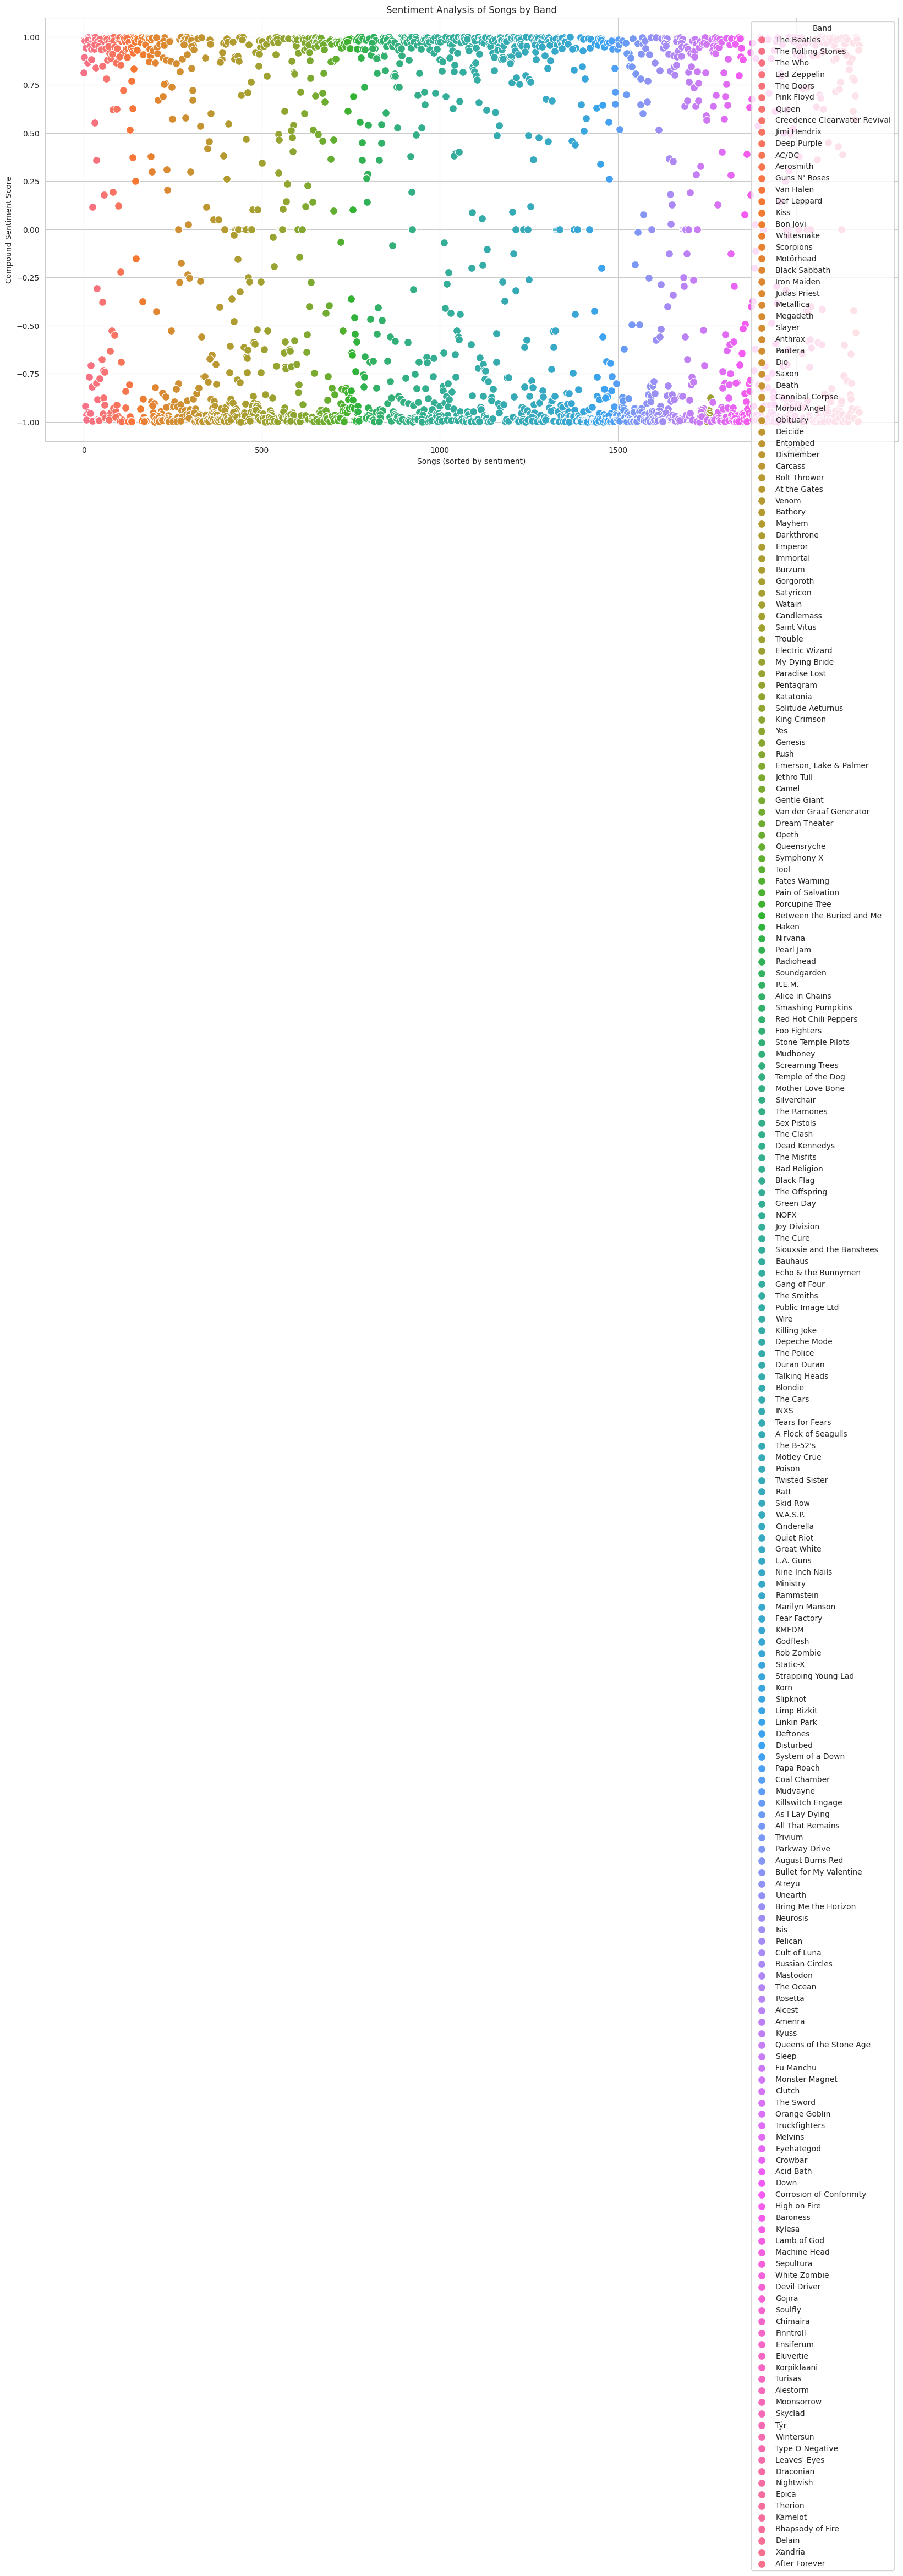

In [19]:
# WRITE HERE DATA VISUALISATION

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sentiment_lyrics_dataset.csv')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a color palette for the bands
bands = df['Band'].unique()
palette = sns.color_palette("husl", len(bands))
band_color_map = dict(zip(bands, palette))

# Plotting the sentiment scores by band
plt.figure(figsize=(20, 10))

for band in bands:
    band_data = df[df['Band'] == band].sort_values(by='compound', ascending=False)
    sns.scatterplot(x=band_data.index, y=band_data['compound'], label=band, color=band_color_map[band], s=100)

plt.title('Sentiment Analysis of Songs by Band')
plt.xlabel('Songs (sorted by sentiment)')
plt.ylabel('Compound Sentiment Score')
plt.legend(title='Band')
plt.show()


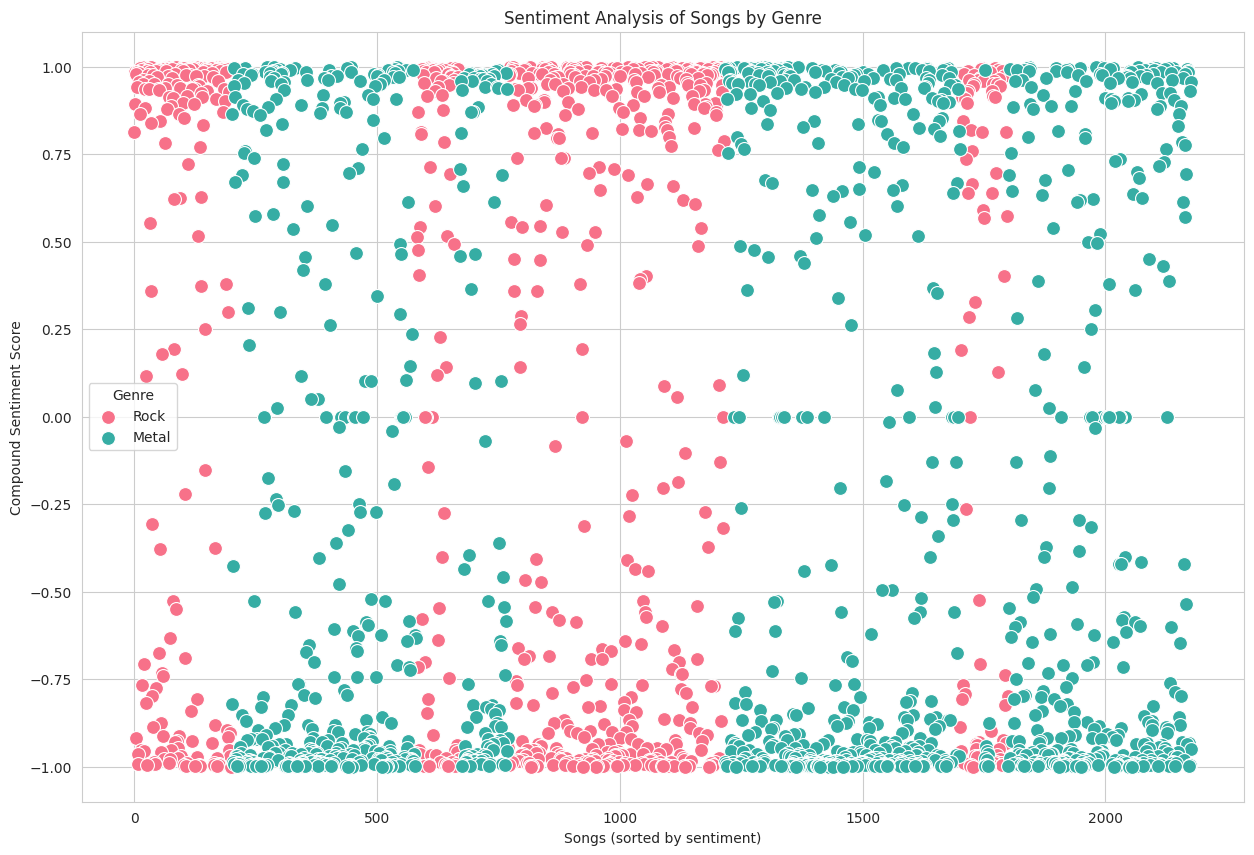

In [21]:
# Create a color palette for the genres
genres = df['Genre'].unique()
palette = sns.color_palette("husl", len(genres))
genre_color_map = dict(zip(genres, palette))

# Plotting the sentiment scores by genre
plt.figure(figsize=(15, 10))

for genre in genres:
    genre_data = df[df['Genre'] == genre].sort_values(by='compound', ascending=False)
    sns.scatterplot(x=genre_data.index, y=genre_data['compound'], label=genre, color=genre_color_map[genre], s=100)

plt.title('Sentiment Analysis of Songs by Genre')
plt.xlabel('Songs (sorted by sentiment)')
plt.ylabel('Compound Sentiment Score')
plt.legend(title='Genre')
plt.show()

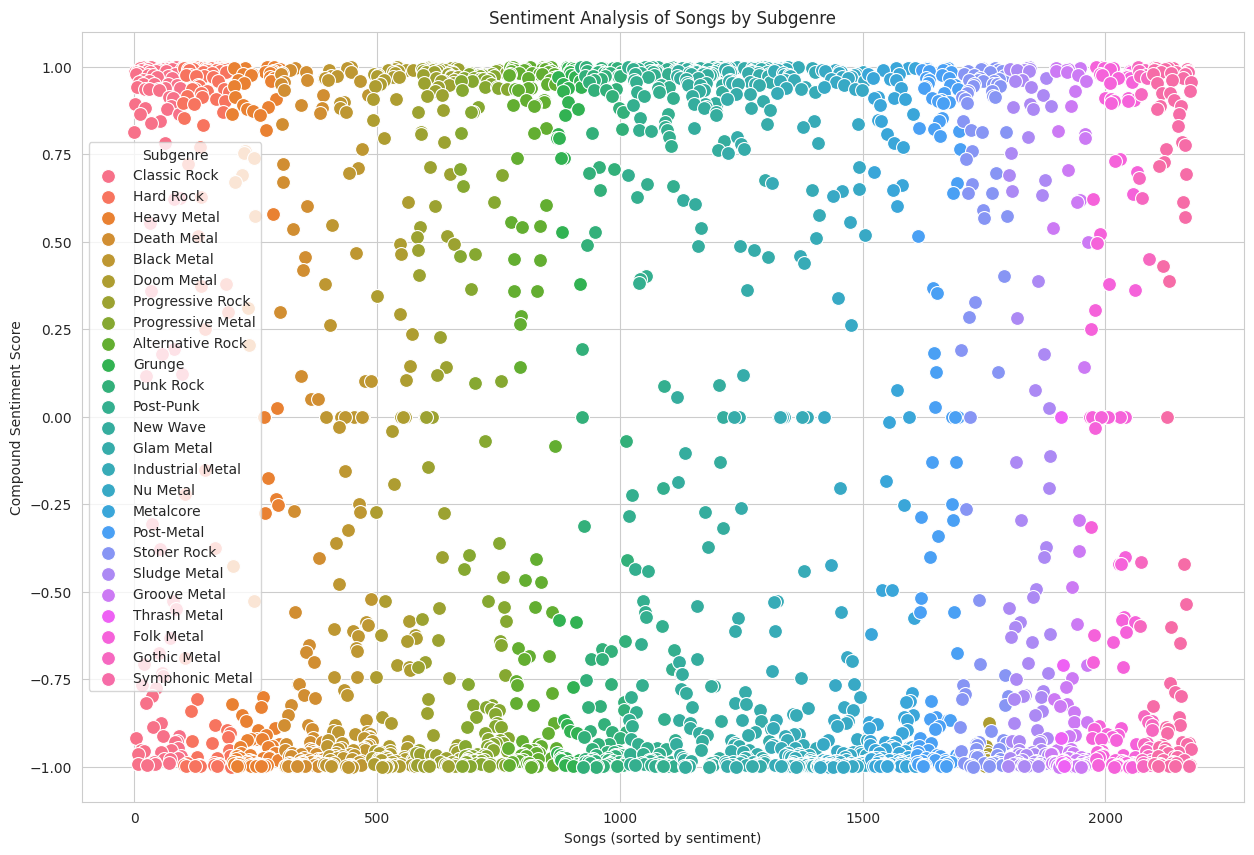

In [23]:

# Create a color palette for the subgenres
subgenres = df['Subgenre'].unique()
palette = sns.color_palette("husl", len(subgenres))
subgenre_color_map = dict(zip(subgenres, palette))

# Plotting the sentiment scores by subgenre
plt.figure(figsize=(15, 10))

for subgenre in subgenres:
    subgenre_data = df[df['Subgenre'] == subgenre].sort_values(by='compound', ascending=False)
    sns.scatterplot(x=subgenre_data.index, y=subgenre_data['compound'], label=subgenre, color=subgenre_color_map[subgenre], s=100)

plt.title('Sentiment Analysis of Songs by Subgenre')
plt.xlabel('Songs (sorted by sentiment)')
plt.ylabel('Compound Sentiment Score')
plt.legend(title='Subgenre')
plt.show()


   Genre  compound
0  Metal -0.268509
1   Rock  0.146148


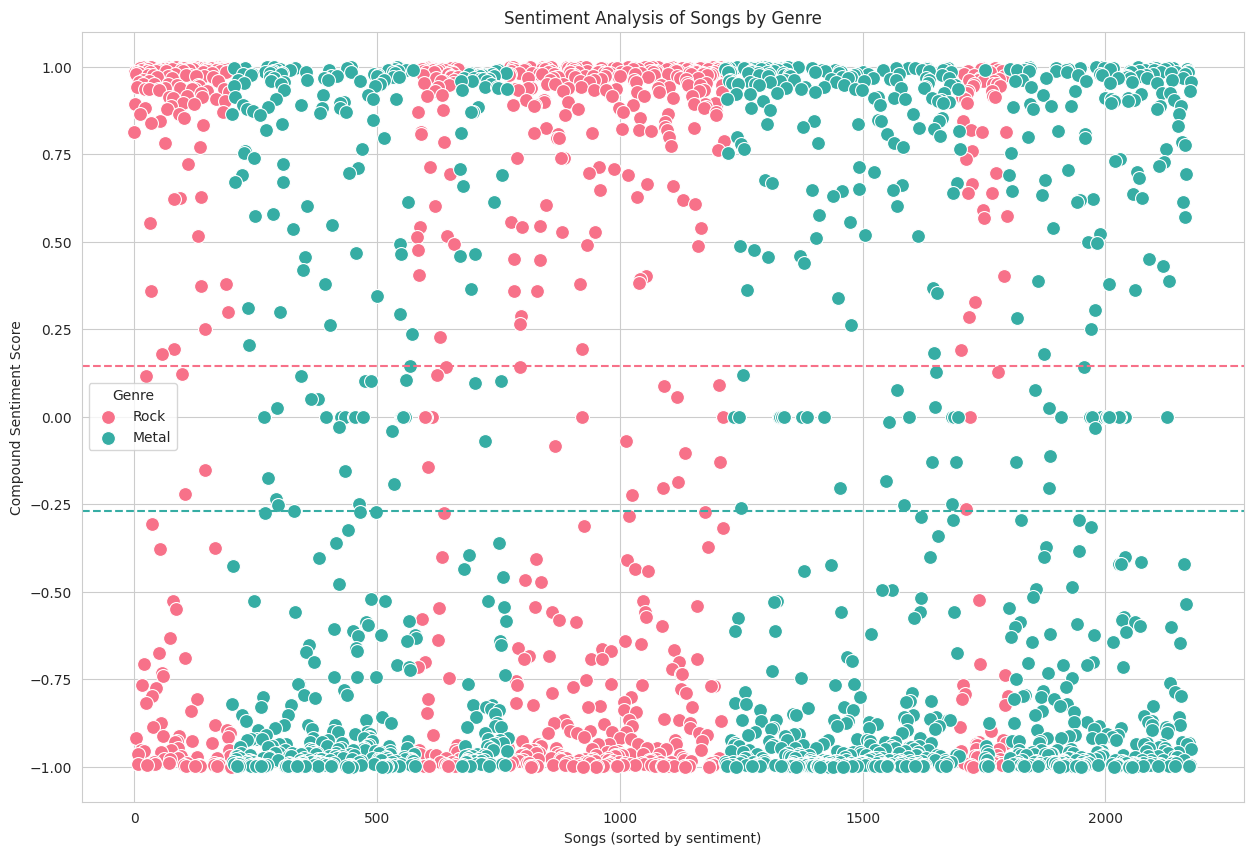

In [27]:
# Create a color palette for the genres
genres = df['Genre'].unique()
palette = sns.color_palette("husl", len(genres))
genre_color_map = dict(zip(genres, palette))

# Plotting the sentiment scores by genre
plt.figure(figsize=(15, 10))

for genre in genres:
    genre_data = df[df['Genre'] == genre].sort_values(by='compound', ascending=False)
    sns.scatterplot(x=genre_data.index, y=genre_data['compound'], label=genre, color=genre_color_map[genre], s=100)
    # Add average line for each genre
    plt.axhline(y=genre_data['compound'].mean(), color=genre_color_map[genre], linestyle='--')

# Calculate and print average sentiment for each genre
genre_avg = df.groupby('Genre')['compound'].mean().reset_index()
print(genre_avg)

plt.title('Sentiment Analysis of Songs by Genre')
plt.xlabel('Songs (sorted by sentiment)')
plt.ylabel('Compound Sentiment Score')
plt.legend(title='Genre')
plt.show()

             Subgenre  compound
0    Alternative Rock  0.103698
1         Black Metal -0.383830
2        Classic Rock  0.256735
3         Death Metal -0.484262
4          Doom Metal -0.318824
5          Folk Metal -0.175257
6          Glam Metal  0.061400
7        Gothic Metal -0.183303
8        Groove Metal -0.443230
9              Grunge  0.173960
10          Hard Rock  0.416437
11        Heavy Metal -0.208953
12   Industrial Metal -0.314950
13          Metalcore -0.433033
14           New Wave  0.231887
15           Nu Metal -0.425532
16         Post-Metal -0.022336
17          Post-Punk  0.071123
18  Progressive Metal -0.215811
19   Progressive Rock  0.176314
20          Punk Rock -0.155702
21       Sludge Metal -0.335069
22        Stoner Rock  0.033315
23    Symphonic Metal -0.023181
24       Thrash Metal -0.854170


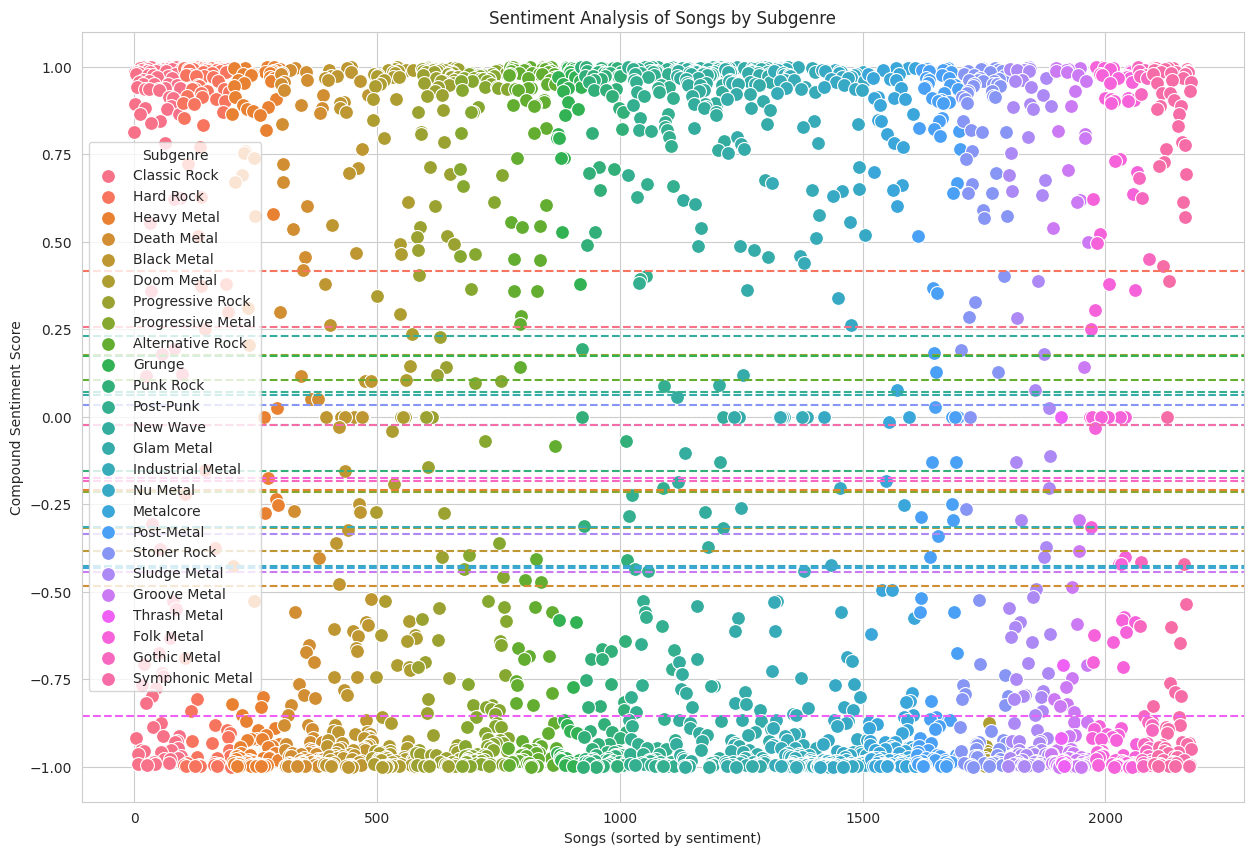

In [28]:
# Create a color palette for the subgenres
subgenres = df['Subgenre'].unique()
palette = sns.color_palette("husl", len(subgenres))
subgenre_color_map = dict(zip(subgenres, palette))

# Plotting the sentiment scores by subgenre
plt.figure(figsize=(15, 10))

for subgenre in subgenres:
    subgenre_data = df[df['Subgenre'] == subgenre].sort_values(by='compound', ascending=False)
    sns.scatterplot(x=subgenre_data.index, y=subgenre_data['compound'], label=subgenre, color=subgenre_color_map[subgenre], s=100)
    # Add average line for each subgenre
    plt.axhline(y=subgenre_data['compound'].mean(), color=subgenre_color_map[subgenre], linestyle='--')

# Calculate and print average sentiment for each subgenre
subgenre_avg = df.groupby('Subgenre')['compound'].mean().reset_index()
print(subgenre_avg)

plt.title('Sentiment Analysis of Songs by Subgenre')
plt.xlabel('Songs (sorted by sentiment)')
plt.ylabel('Compound Sentiment Score')
plt.legend(title='Subgenre')
plt.show()

In [ ]:
# TRAIN SCRIPT, DO NOT RUN

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from tqdm import tqdm  # Import tqdm for the progress bar

# Load dataset
df = pd.read_csv('dataset.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Concatenate band name, genre, and subgenre with the lyrics
df['Input'] = df['Band'] + ' <genre> ' + df['Genre'] + ' <subgenre> ' + df['Subgenre'] + ' <lyrics> ' + df['Lyrics']

# Tokenizer and padding functions
class CustomTokenizer:
    def __init__(self, num_words=None):
        self.word_index = {}
        self.index_word = {}
        self.vocab_size = 0
        self.num_words = num_words

    def fit_on_texts(self, texts):
        words = [word for text in texts for word in word_tokenize(text.lower())]
        freq_dist = FreqDist(words)
        if self.num_words:
            freq_dist = dict(freq_dist.most_common(self.num_words))
        self.word_index = {word: index + 1 for index, (word, _) in enumerate(freq_dist.items())}
        self.index_word = {index: word for word, index in self.word_index.items()}
        self.vocab_size = len(self.word_index) + 1

    def texts_to_sequences(self, texts):
        return [[self.word_index[word] for word in word_tokenize(text.lower()) if word in self.word_index] for text in texts]

def pad_sequences(sequences, maxlen, padding='pre'):
    padded_sequences = np.zeros((len(sequences), maxlen), dtype=np.int32)
    for i, seq in enumerate(sequences):
        if padding == 'pre':
            padded_sequences[i, -len(seq):] = np.array(seq)[:maxlen]
        elif padding == 'post':
            padded_sequences[i, :len(seq)] = np.array(seq)[:maxlen]
    return padded_sequences

# Tokenize the input data
max_vocab_size = 5000  # Limit the vocabulary size
tokenizer = CustomTokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(df['Input'])
total_words = tokenizer.vocab_size

input_sequences = []
for line in df['Input']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = 100  # Limit the maximum sequence length
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create predictors and label
X, y = input_sequences[:,:-1], input_sequences[:,-1]

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.long)
y = torch.tensor(y, dtype=torch.long)

class LyricsDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

dataset = LyricsDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the model
class LyricsModel(nn.Module):
    def __init__(self, total_words, embed_size, hidden_size, max_sequence_len):
        super(LyricsModel, self).__init__()
        self.embedding = nn.Embedding(total_words, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, total_words)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.fc(x)
        return x

embed_size = 100
hidden_size = 150

model = LyricsModel(total_words, embed_size, hidden_size, max_sequence_len).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
best_loss = float('inf')
best_model_path = 'best_lyrics_model.pth'

import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    progress_bar = tqdm(dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_epoch_loss = epoch_loss / len(dataloader)
    if avg_epoch_loss < best_loss:
        best_loss = avg_epoch_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f} (Best Model Saved)")

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Generating lyrics
def generate_lyrics(seed_text, next_words, model, max_sequence_len, tokenizer):
    model.eval()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        token_list = torch.tensor(token_list).long().to(device)
        with torch.no_grad():
            predicted = model(token_list)
            predicted_index = torch.argmax(predicted, dim=1).item()
        output_word = tokenizer.index_word.get(predicted_index, "")
        seed_text += " " + output_word
    return seed_text

# Loading the best model
best_model = LyricsModel(total_words, embed_size, hidden_size, max_sequence_len).to(device)
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()

# Generate lyrics using the best model
seed_text = "Metallica"
generated_lyrics = generate_lyrics(seed_text, 100, best_model, max_sequence_len, tokenizer)
print(generated_lyrics)

MemoryError: Unable to allocate 20.7 GiB for an array with shape (612894, 9058) and data type int32

In [ ]:
#RUN THIS TO GENERATE LYRICS

# Loading the best model and tokenizer
best_model_path = 'best_lyrics_model.pth'
tokenizer_path = 'tokenizer.pkl'

# Assuming 'tokenizer' is the instance of CustomTokenizer
with open(tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
total_words = tokenizer.vocab_size
embed_size = 100
hidden_size = 150
max_sequence_len = 100

best_model = LyricsModel(total_words, embed_size, hidden_size, max_sequence_len).to(device)
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()

# Generate lyrics using the best model
seed_text = "Tyr <genre> Metal"
generated_lyrics = generate_lyrics(seed_text, 100, best_model, max_sequence_len, tokenizer, temperature=0.8)
print(generated_lyrics)

In [ ]:
# TRAIN SCRIPT, DO NOT RUN


import pickle

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('dataset.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Encode labels
label_encoders = {
    'Band': LabelEncoder(),
    'Genre': LabelEncoder(),
    'Subgenre': LabelEncoder()
}
df['Band'] = label_encoders['Band'].fit_transform(df['Band'])
df['Genre'] = label_encoders['Genre'].fit_transform(df['Genre'])
df['Subgenre'] = label_encoders['Subgenre'].fit_transform(df['Subgenre'])

# Concatenate band name, genre, and subgenre with the lyrics
df['Input'] = df['Band'].astype(str) + ' <genre> ' + df['Genre'].astype(str) + ' <subgenre> ' + df['Subgenre'].astype(str) + ' <lyrics> ' + df['Lyrics']

# Tokenizer and padding functions
class CustomTokenizer:
    def __init__(self, num_words=None):
        self.word_index = {}
        self.index_word = {}
        self.vocab_size = 0
        self.num_words = num_words

    def fit_on_texts(self, texts):
        words = [word for text in texts for word in word_tokenize(text.lower())]
        freq_dist = FreqDist(words)
        if self.num_words:
            freq_dist = dict(freq_dist.most_common(self.num_words))
        self.word_index = {word: index + 1 for index, (word, _) in enumerate(freq_dist.items())}
        self.index_word = {index: word for word, index in self.word_index.items()}
        self.vocab_size = len(self.word_index) + 1

    def texts_to_sequences(self, texts):
        return [[self.word_index[word] for word in word_tokenize(text.lower()) if word in self.word_index] for text in texts]

def pad_sequences(sequences, maxlen, padding='pre'):
    padded_sequences = np.zeros((len(sequences), maxlen), dtype=np.int32)
    for i, seq in enumerate(sequences):
        if padding == 'pre':
            padded_sequences[i, -len(seq):] = np.array(seq)[:maxlen]
        elif padding == 'post':
            padded_sequences[i, :len(seq)] = np.array(seq)[:maxlen]
    return padded_sequences

# Tokenize the input data
max_vocab_size = 5000  # Limit the vocabulary size
tokenizer = CustomTokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(df['Input'])
total_words = tokenizer.vocab_size

input_sequences = tokenizer.texts_to_sequences(df['Input'])
max_sequence_len = 100  # Limit the maximum sequence length
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create predictors and label
X = torch.tensor(input_sequences, dtype=torch.long)
y_band = torch.tensor(df['Band'].values, dtype=torch.long)
y_genre = torch.tensor(df['Genre'].values, dtype=torch.long)
y_subgenre = torch.tensor(df['Subgenre'].values, dtype=torch.long)

class LyricsDataset(Dataset):
    def __init__(self, X, y_band, y_genre, y_subgenre):
        self.X = X
        self.y_band = y_band
        self.y_genre = y_genre
        self.y_subgenre = y_subgenre

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y_band[idx], self.y_genre[idx], self.y_subgenre[idx]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

dataset = LyricsDataset(X, y_band, y_genre, y_subgenre)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the model
class LyricsClassificationModel(nn.Module):
    def __init__(self, total_words, embed_size, hidden_size, max_sequence_len, num_bands, num_genres, num_subgenres):
        super(LyricsClassificationModel, self).__init__()
        self.embedding = nn.Embedding(total_words, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc_band = nn.Linear(hidden_size, num_bands)
        self.fc_genre = nn.Linear(hidden_size, num_genres)
        self.fc_subgenre = nn.Linear(hidden_size, num_subgenres)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        band_out = self.fc_band(x)
        genre_out = self.fc_genre(x)
        subgenre_out = self.fc_subgenre(x)
        return band_out, genre_out, subgenre_out

embed_size = 100
hidden_size = 150
num_bands = len(label_encoders['Band'].classes_)
num_genres = len(label_encoders['Genre'].classes_)
num_subgenres = len(label_encoders['Subgenre'].classes_)

model = LyricsClassificationModel(total_words, embed_size, hidden_size, max_sequence_len, num_bands, num_genres, num_subgenres).to(device)
criterion_band = nn.CrossEntropyLoss()
criterion_genre = nn.CrossEntropyLoss()
criterion_subgenre = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
best_loss = float('inf')
best_model_path = 'best_lyrics_classification_model.pth'

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels_band, labels_genre, labels_subgenre in dataloader:
        inputs, labels_band, labels_genre, labels_subgenre = inputs.to(device), labels_band.to(device), labels_genre.to(device), labels_subgenre.to(device)
        outputs_band, outputs_genre, outputs_subgenre = model(inputs)
        loss_band = criterion_band(outputs_band, labels_band)
        loss_genre = criterion_genre(outputs_genre, labels_genre)
        loss_subgenre = criterion_subgenre(outputs_subgenre, labels_subgenre)

        loss = loss_band + loss_genre + loss_subgenre

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(dataloader)
    if avg_epoch_loss < best_loss:
        best_loss = avg_epoch_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f} (Best Model Saved)")

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# After training the model
with open('tokenizer_claassif.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('label_encoders.pkl', 'wb') as handle:
    pickle.dump(label_encoders, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load the best model
best_model = LyricsClassificationModel(total_words, embed_size, hidden_size, max_sequence_len, num_bands, num_genres, num_subgenres).to(device)
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()

# Predict genre, subgenre, and band function
def predict_genre_subgenre_band(text, model, max_sequence_len, tokenizer, label_encoders):
    model.eval()
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    token_list = torch.tensor(token_list).long().to(device)
    with torch.no_grad():
        output_band, output_genre, output_subgenre = model(token_list)
        predicted_band_idx = torch.argmax(output_band, dim=1).item()
        predicted_genre_idx = torch.argmax(output_genre, dim=1).item()
        predicted_subgenre_idx = torch.argmax(output_subgenre, dim=1).item()
    predicted_band = label_encoders['Band'].inverse_transform([predicted_band_idx])[0]
    predicted_genre = label_encoders['Genre'].inverse_transform([predicted_genre_idx])[0]
    predicted_subgenre = label_encoders['Subgenre'].inverse_transform([predicted_subgenre_idx])[0]
    return predicted_band, predicted_genre, predicted_subgenre

In [ ]:
#RUN THIS TO GET LABELS FROM LYRICS


def load_model_and_encoders(model_path, tokenizer_path, encoders_path):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Load the tokenizer
    with open(tokenizer_path, 'rb') as handle:
        tokenizer = pickle.load(handle)

    # Load the label encoders
    with open(encoders_path, 'rb') as handle:
        label_encoders = pickle.load(handle)

    # Define the model structure and load the trained weights
    total_words = tokenizer.vocab_size
    embed_size = 100
    hidden_size = 150
    num_bands = len(label_encoders['Band'].classes_)
    num_genres = len(label_encoders['Genre'].classes_)
    num_subgenres = len(label_encoders['Subgenre'].classes_)
    max_sequence_len = 100

    model = LyricsClassificationModel(total_words, embed_size, hidden_size, max_sequence_len, num_bands, num_genres,
                                      num_subgenres).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    return model, tokenizer, label_encoders, device

model_path = 'best_lyrics_classification_model.pth'
tokenizer_path = 'tokenizer_claassif.pkl'
encoders_path = 'label_encoders.pkl'

model, tokenizer, label_encoders, device = load_model_and_encoders(model_path, tokenizer_path, encoders_path)

text_to_predict = "When the quest is over and the battle's won There's a land far to the south where we go to have some fun The wenches they are plenty, the alcohol is free The party lasts all through the night and the alcohol is free"
predicted_band, predicted_genre, predicted_subgenre = predict_genre_subgenre_band(text_to_predict, model, 100,
                                                                                  tokenizer, label_encoders, device)
print(f"Predicted Band: {predicted_band}, Predicted Genre: {predicted_genre}, Predicted Subgenre: {predicted_subgenre}")